
# **Corporate Credit Analysis Project**


Hello everyone, here you can find my corporate credit analysis project, where i delve into the relationship between various financial indicators and credit ratings of different corporations.

In this project, i have leverage data from diverse credit rating agencies such as Standard & Poor's, Moody's, and Egan-Jones to analyze and predict the credit ratings of companies. The dataset used includes key financial information like liquidity ratios, profit margins, and debt metrics.


***Data Exploration***

Data Structure: Pandas, NumPy, and Matplotlib to load and explore data.

Temporal Visualizations: i have use temporal analysis of credit ratings over time, unveiling trends and patterns.


***Ratings Comparison by Sector***

With the help of seaborn, i have compared credit ratings across different sectors to identify variations and insights.

***Correlation Matrix for Financial Variables***

A heatmap was created to visualize the correlation matrix, in order to show a comprehensive relationships among financial variables.

***Modeling and Prediction***

* Model 1 - Linear Regression
Achieved a Mean Squared Error of 12.13 and an R^2 Score of 0.14.
* Model 2 - Random Forest Regressor
Outperformed with a Mean Squared Error of 3.20 and an impressive R^2 Score of 0.77.
* Model 3 - Gradient Boosting Regressor
Delivered a Mean Squared Error of 6.11 and an R^2 Score of 0.57.
* Model 4 - Support Vector Regressor (SVR)
Showcased a Mean Squared Error of 7.88 and an R^2 Score of 0.44.
* Model 5 - K-Nearest Neighbors Regressor
Scored a Mean Squared Error of 5.44 and an R^2 Score of 0.61.
* Model 6 - Neural Network
A deeper neural network resulted in a Mean Squared Error of 14.51 and an R^2 Score of -0.03.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
data=pd.read_csv("/content/corporateCreditRatingWithFinancialRatios.csv")

In [ ]:
data

,Rating Agency,Corporation,Rating,Rating Date,CIK,Binary Rating,SIC Code,Sector,Ticker,Current Ratio,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,American States Water Co.,A-,2010-07-30,1056903,1,4941.0,Utils,AWR,1.1507,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,Automatic Data Processing Inc.,AAA,2010-09-16,8670,1,7374.0,BusEq,ADP,1.1129,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,Avnet Inc.,BBB-,2010-11-23,8858,1,5065.0,Shops,AVT,1.9276,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,California Water Service Co.,AA-,2010-06-29,1035201,1,4941.0,Utils,CWT,0.8358,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,Cardinal Health Inc.,A,2010-07-14,721371,1,5122.0,Shops,CAH,1.2931,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,Moody's Investors Service,"eBay, Inc.",BBB+,2016-02-22,1065088,1,7370.0,BusEq,EBAY,3.4927,...,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7801,Moody's Investors Service,"eBay, Inc.",BBB+,2016-03-02,1065088,1,7370.0,BusEq,EBAY,3.4927,...,33.5661,28.0028,20.0768,0.4839,29.6077,95.6757,10.9659,14.6116,-1.2323,-1.2826
7802,Standard & Poor's Ratings Services,iHeartCommunications Inc.,CC,2016-03-08,739708,0,4832.0,Telcm,CCU,1.7606,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552
7803,Standard & Poor's Ratings Services,iHeartCommunications Inc.,CCC,2016-03-24,739708,0,4832.0,Telcm,CCU,1.7606,...,14.2454,12.7232,8.0626,0.8218,11.8335,13.5108,7.7070,10.6101,0.0907,1.2552


In [ ]:
data["Rating Agency"].value_counts()

Egan-Jones Ratings Company            2826
Standard & Poor's Ratings Services    2813
Moody's Investors Service             1636
Fitch Ratings                          477
DBRS                                    26
Japan Credit Rating Agency,Ltd.         22
HR Ratings de Mexico S.A. de C.V.        5
Name: Rating Agency, dtype: int64

In [ ]:
data["Rating"].value_counts()

BBB     910
BBB+    846
A       836
A-      722
BBB-    705
BB+     545
A+      478
BB      453
BB-     427
B+      422
B       310
B-      288
AA-     254
AA      185
CCC+    151
AAA      90
AA+      73
CCC      65
CC       18
C        11
CCC-     10
D         5
CC+       1
Name: Rating, dtype: int64

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CIK,7805.0,737161.588725,514354.179999,1750.0000,93556.0000,879526.0000,1.091587e+06,1.748790e+06
Binary Rating,7805.0,0.653299,0.475950,0.0000,0.0000,1.0000,1.000000e+00,1.000000e+00
SIC Code,7805.0,4052.576810,1870.848802,100.0000,2834.0000,3714.0000,4.931000e+03,9.997000e+03
Current Ratio,7805.0,1.926313,1.921651,0.1749,1.0773,1.4968,2.161000e+00,3.407680e+01
Long-term Debt / Capital,7805.0,0.452804,2.629158,-86.3636,0.2865,0.4272,5.422000e-01,1.715000e+02
Debt/Equity Ratio,7805.0,0.177349,34.456334,-1473.0980,0.4197,0.7528,1.211600e+00,1.943750e+02
Gross Margin,7805.0,42.433909,23.742020,-87.6840,22.4539,39.6354,5.964170e+01,1.000000e+02
Operating Margin,7805.0,11.531612,25.469044,-461.7878,6.0982,12.1201,1.946460e+01,9.399300e+01
EBIT Margin,7805.0,11.582683,25.483934,-461.7878,6.1811,12.1558,1.953990e+01,9.399300e+01
EBITDA Margin,7805.0,20.071493,24.380407,-360.8169,11.1621,18.3045,3.066160e+01,2.864935e+02


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rating Agency                  7805 non-null   object 
 1   Corporation                    7805 non-null   object 
 2   Rating                         7805 non-null   object 
 3   Rating Date                    7805 non-null   object 
 4   CIK                            7805 non-null   int64  
 5   Binary Rating                  7805 non-null   int64  
 6   SIC Code                       7805 non-null   float64
 7   Sector                         7805 non-null   object 
 8   Ticker                         7805 non-null   object 
 9   Current Ratio                  7805 non-null   float64
 10  Long-term Debt / Capital       7805 non-null   float64
 11  Debt/Equity Ratio              7805 non-null   float64
 12  Gross Margin                   7805 non-null   f

In [ ]:
# Conversion of 'Rating Date' to date format
data['Rating Date'] = pd.to_datetime(data['Rating Date'])

In [ ]:
# Conversion of rating to numeric format
rating_mapping = {
    'AAA': 21,
    'AA+': 20,
    'AA': 19,
    'AA-': 18,
    'A+': 17,
    'A': 16,
    'A-': 15,
    'BBB+': 14,
    'BBB': 13,
    'BBB-': 12,
    'BB+': 11,
    'BB': 10,
    'BB-': 9,
    'B+': 8,
    'B': 7,
    'B-': 6,
    'CCC+': 5,
    'CCC': 4,
    'CCC-': 3,
    'CC+': 2,
    'CC': 1,
    'C': 0,
    'D': -1
}

data['Rating'] = data['Rating'].map(rating_mapping)

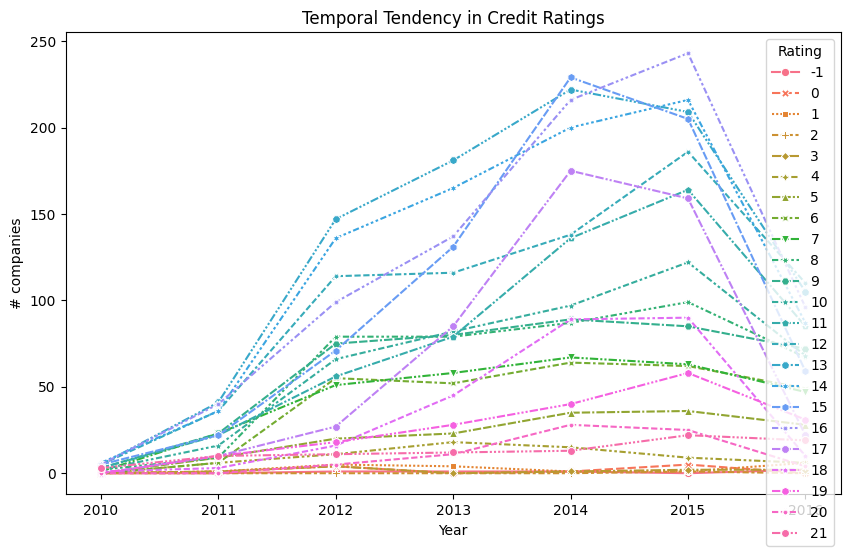

In [ ]:
# Temporal tendency analysis for the credit ratings over the time

# New column for the rating year
data['Year'] = data['Rating Date'].dt.year

# Distribution per year
rating_counts_by_year = data.groupby(['Year', 'Rating']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
sns.lineplot(data=rating_counts_by_year, markers=True)
plt.title('Temporal Tendency in Credit Ratings')
plt.xlabel('Year')
plt.ylabel('# companies')
plt.legend(title='Rating')
plt.show()

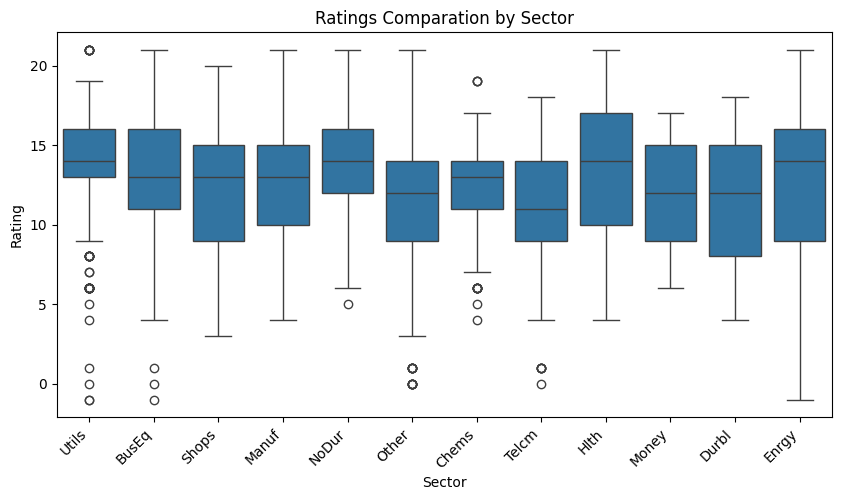

In [ ]:
# Sector distribution comparation for credit rating and financial ratios

plt.figure(figsize=(10, 5))
sns.boxplot(x='Sector', y='Rating', data=data)
plt.title('Ratings Comparation by Sector')
plt.xlabel('Sector')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-199-58156107c70a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


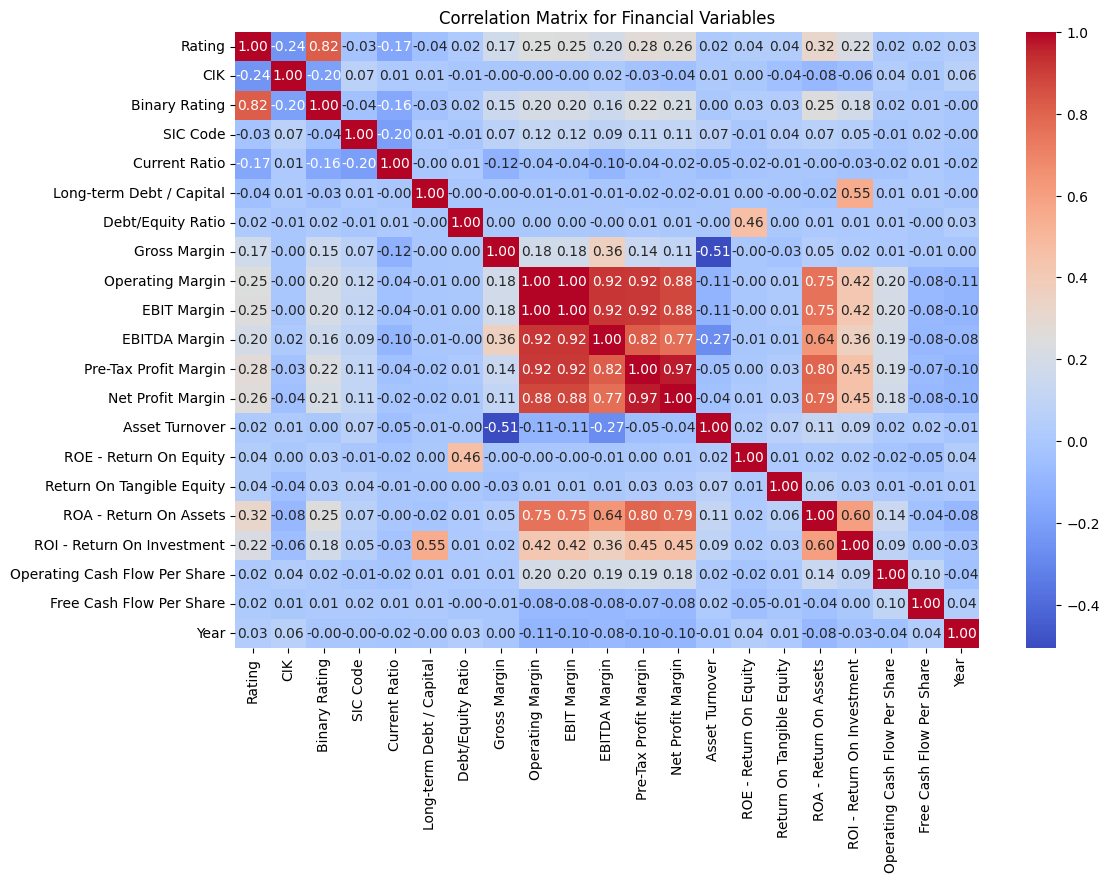

In [ ]:
# Correlation Matrix
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Financial Variables')
plt.show()

In [ ]:
data.columns

Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share', 'Year'],
      dtype='object')

In [ ]:
# Preparing Data for the Model
X = data[['Current Ratio', 'Operating Cash Flow Per Share', 'Free Cash Flow Per Share',
        'Long-term Debt / Capital', 'Debt/Equity Ratio',
        'ROE - Return On Equity', 'Return On Tangible Equity', 'ROA - Return On Assets', 'ROI - Return On Investment',
        'Gross Margin', 'Operating Margin', 'EBIT Margin', 'EBITDA Margin', 'Pre-Tax Profit Margin', 'Net Profit Margin',
        'Asset Turnover']]

y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Model 1 - Linear Regression***

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediction for test
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 12.13
R^2 Score: 0.14


***Model 2 - Random Forest Regressor***

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Prediction for test
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 3.20
R^2 Score: 0.77


***Model 3 - Gradient Boosting Regressor***

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Prediction for test
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 6.11
R^2 Score: 0.57


***Model 4 - Support Vector Regressor (SVR)***

In [ ]:
model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [ ]:
# Prediction for test
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 7.88
R^2 Score: 0.44


***Model 5 - K-Nearest Neighbors Regressor***

In [ ]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
# Prediction for test
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 5.44
R^2 Score: 0.61


***Model 6 - Neuronal Network***

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Features in the data set to predict
num_features = X.shape[1]

# Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
196/196 [==============================] - 2s 7ms/step - loss: 641.1078 - val_loss: 36.1932
Epoch 2/50
196/196 [==============================] - 1s 4ms/step - loss: 943.1301 - val_loss: 872.4287
Epoch 3/50
196/196 [==============================] - 1s 3ms/step - loss: 852.1483 - val_loss: 33.8280
Epoch 4/50
196/196 [==============================] - 1s 3ms/step - loss: 53.4124 - val_loss: 37.5998
Epoch 5/50
196/196 [==============================] - 1s 3ms/step - loss: 48.7573 - val_loss: 81.8544
Epoch 6/50
196/196 [==============================] - 0s 2ms/step - loss: 130.3275 - val_loss: 84.1769
Epoch 7/50
196/196 [==============================] - 1s 3ms/step - loss: 24.6736 - val_loss: 21.0289
Epoch 8/50
196/196 [==============================] - 1s 3ms/step - loss: 23.7329 - val_loss: 32.4307
Epoch 9/50
196/196 [==============================] - 1s 4ms/step - loss: 84.9607 - val_loss: 363.0404
Epoch 10/50
196/196 [==============================] - 1s 6ms/step - loss: 7

In [ ]:
# Prediction for test
y_pred = model.predict(X_test)

49/49 [==============================] - 0s 2ms/step


In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 14.51
R^2 Score: -0.03


In conclusion, the best model it is RandomForest with a result of Mean Squared Error: 3.20
R^2 Score: 0.77

This is a vgood result. If we wanted to go futher we would need to use a deeper Neuronal network project